Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
255
0
68


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


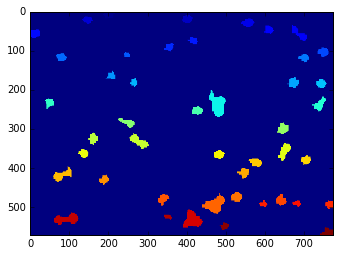

In [11]:
%pylab
%matplotlib inline
import cv2
from skimage import io
import numpy as np
from matplotlib import pylab as plt
im_1 = cv2.imread('/home/cesar/Desktop/1.png',cv2.IMREAD_GRAYSCALE)
#im_2 = cv2.imread('/home/cesar/Desktop/datasetmini/blur.jpg',cv2.IMREAD_GRAYSCALE)

print(ndarray.max(im_1))
print(ndarray.min(im_1))
im_1_inverse = 255-im_1
ret, thresh = cv2.threshold(im_1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# You need to choose 4 or 8 for connectivity type
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
print(num_labels)
# The second cell is the label matrix
labels = output[1]

#io.imshow(labels)
# The third cell is the stat matrix
stats = output[2]
#print(stats)
# The fourth cell is the centroid matrix
centroids = output[3]
#print(centroids)

tamano=[labels[0].shape, labels[1].shape]

#esta es la parte que quiero optimizar, anda muy lento. no se como guardar las variables x,y en una listay recorrerlacon un solo for
for x in range(labels.shape[0]):
    for y in range(labels.shape[1]):
        
        if (stats[(labels[x,y]),4] <=150)  and (stats[(labels[x,y]),4] != 0):
            labels[x,y] = 0


plt.imshow(labels)
plt.show()

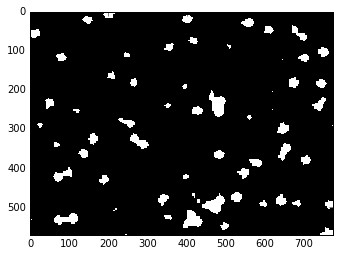

In [23]:
dst=io.imread("/home/cesar/Desktop/1.png")
io.imshow(dst)


[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [255 255 255 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [255 255 255 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ..., 
 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


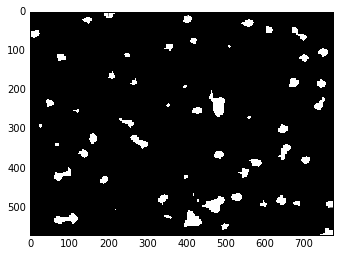

In [24]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(dst,kernel,iterations = 2)
erosion = cv2.erode(dilation,kernel,iterations = 3)
io.imshow(erosion)
print(erosion)

In [38]:
mask=np.uint8(erosion)
im_1_inverse = 255-mask

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(im_1, connectivity=8)


sizes=stats[1:,-1];
nb_components= nb_components-1
minsize=150
filtered_mask= np.zeros((output.shape))
print(filtered_mask)
for i in range(0,nb_components):
    if sizes[i]>=minsize:
        filtered_mask[output==i+1]=255
   
plt.imshow(filtered_mask)
plt.show()

error: /io/opencv/modules/imgproc/src/connectedcomponents.cpp:3932: error: (-215) L.channels() == 1 && I.channels() == 1 in function connectedComponents_sub1


# Segmentacion


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[[  0   0   0 ..., 255 255 255]
 [  0   0   0 ..., 255 255 255]
 [  0   0   0 ..., 255 255 255]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]


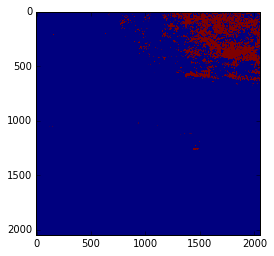

In [3]:
%pylab
%matplotlib inline
import cv2
from skimage import io
import numpy as np
from matplotlib import pylab as plt
im=cv2.imread("/home/cesar/Desktop/datasetmini/train/35.jpg")        
im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
red1_low = np.array([0, 217, 83], dtype=np.uint8)
red1_high = np.array([12, 255, 255], dtype=np.uint8)
# red2
red2_low = np.array([140, 120, 50], dtype=np.uint8)
red2_high = np.array([179, 240, 235], dtype=np.uint8)
# red4
red4_low = np.array([140, 142, 102], dtype=np.uint8)
red4_high = np.array([179, 255, 255], dtype=np.uint8)
# red5 rose
red5_low = np.array([160, 43, 58], dtype=np.uint8)
red5_high = np.array([170, 196, 143], dtype=np.uint8)
# blue
blue1_low = np.array([115, 132, 160], dtype=np.uint8)
blue1_high = np.array([130, 255, 255], dtype=np.uint8)
# morado
mo1_low = np.array([125, 76, 76], dtype=np.uint8)
mo1_high = np.array([143, 255, 255], dtype=np.uint8)
# yellow black
yellow_lows = np.array([16, 226, 90], dtype=np.uint8)
yellow_high = np.array([22, 255, 180], dtype=np.uint8)


rojo1=np.array([0, 65, 75], dtype=np.uint8)
rojo2=np.array([12, 255, 255], dtype=np.uint8)
# Color ranges used for the specific channel
rmask = cv2.inRange(im, rojo1, rojo2)
r1mask = cv2.inRange(im, red1_low, red1_high)
r2mask = cv2.inRange(im, red2_low, red2_high)
r4mask = cv2.inRange(im, red4_low, red4_high)
r5mask = cv2.inRange(im, red5_low, red5_high)
#bmask = cv2.inRange(im, blue1_low, blue1_high)
#m1mask = cv2.inRange(im, mo1_low, mo1_high)
#ymask = cv2.inRange(im, yellow_lows, yellow_high)
# Creation of the mask, which will add all previously used ranges
mask = cv2.add(r1mask, r2mask)
mask = cv2.add(mask, r4mask)
mask = cv2.add(mask, r5mask)
#mask = cv2.add(mask, bmask)
#mask = cv2.add(mask, m1mask)
#mask = cv2.add(mask, ymask)
#r1mask = cv2.inRange(im, rojo1, rojo2)


#kerneld = np.ones((3, 3), np.uint8)
#opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kerneld)
#closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kerneld)

kerneld = np.ones((3,3),np.uint8)
mask = cv2.dilate(rmask, kerneld, iterations=2)
mask =cv2.erode(mask,kerneld, iterations=1)  


print(closing)
plt.imshow(rmask)
plt.show()


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'hsv']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


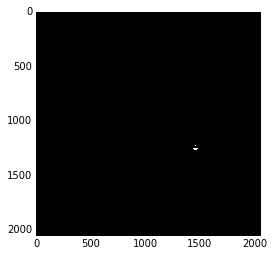

In [10]:
%pylab
%matplotlib inline
import cv2
from skimage import io
import numpy as np
from matplotlib import pylab as plt
im=cv2.imread("/home/cesar/Desktop/datasetmini/train/35.jpg")        
hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

#Rojos:
rojo_bajos1 = np.array([0,120,75], dtype=np.uint8)
rojo_altos1 = np.array([12, 255, 255], dtype=np.uint8)
rojo_bajos2 = np.array([240,65,75], dtype=np.uint8)
rojo_altos2 = np.array([256, 255, 255], dtype=np.uint8)
#Azules:
azul_bajos = np.array([100,65,75], dtype=np.uint8)
azul_altos = np.array([130, 255, 255], dtype=np.uint8)
# yellow 
yellow_lows = np.array([16, 226, 90], dtype=np.uint8)
yellow_high = np.array([22, 255, 180], dtype=np.uint8)
#Crear las mascaras
mascara_rojo1 = cv2.inRange(hsv, rojo_bajos1, rojo_altos1)
#mascara_rojo2 = cv2.inRange(hsv, rojo_bajos2, rojo_altos2)
#mascara_azul = cv2.inRange(hsv, azul_bajos, azul_altos)
#mascara_amarilla = cv2.inRange(hsv, azul_bajos, azul_altos)
#Juntar todas las mascaras
#mask = cv2.add(mascara_rojo1, mascara_rojo2)
#mask = cv2.add(mask, mascara_azul)
#mask = cv2.add(mask, mascara_amarilla)

kerneld = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(mascara_rojo2, cv2.MORPH_OPEN, kerneld)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kerneld)
io.imshow(mascara_rojo1)


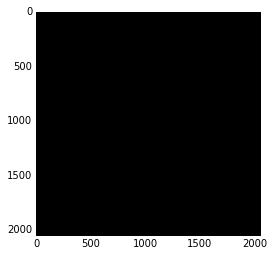

In [75]:
maskb = np.uint8(closing)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(maskb, connectivity=8)

sizes = stats[1:, -1];
nb_components = nb_components - 1
minsize = 310
maxsize = 2000
blobs = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= minsize and sizes[i]<=maxsize :
        blobs[output == i + 1] = 255


kerneld = np.ones((3,3),np.uint8)
mask = cv2.dilate(blobs, kerneld, iterations=4)
mask =cv2.erode(mask,kerneld, iterations=1)  
io.imshow(mask)

950
[[      0       0    2048    2048 3940653]
 [    576       0       2       3       4]
 [    590       0       2       3       4]
 ..., 
 [   1428    1251      52      18     620]
 [   1430    1265       1       1       1]
 [   1436    1268       1       1       1]]


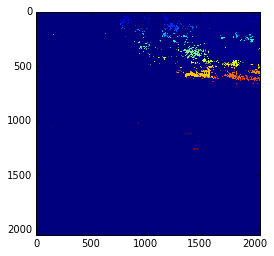

In [102]:





ret, thresh = cv2.threshold(rmask,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# You need to choose 4 or 8 for connectivity type
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
print(num_labels)
# The second cell is the label matrix
labels = output[1]

#io.imshow(labels)
# The third cell is the stat matrix
stats = output[2]
print(stats)
# The fourth cell is the centroid matrix
centroids = output[3]
#print(centroids)



for x in range(labels.shape[0]):
    for y in range(labels.shape[1]):
        if (stats[(labels[x,y]),4] <=100) and (stats[(labels[x,y]),4] >= 500):
            labels[x,y] = 0
            


plt.imshow(labels)
plt.show()

In [60]:
%pylab
%matplotlib inline
import cv2
from skimage import io
import numpy as np
from matplotlib import pylab as plt
im_1 = cv2.imread('/home/cesar/Desktop/blobs/blob1.tiff',cv2.IMREAD_GRAYSCALE)
im_2 = cv2.imread('/home/cesar/Desktop/datasetmini/blur.jpg',cv2.IMREAD_GRAYSCALE)

print(ndarray.max(im_2))
print(ndarray.min(im_2))
im_1_inverse = 255-im_1
ret, thresh = cv2.threshold(im_1_inverse,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# You need to choose 4 or 8 for connectivity type
connectivity = 4  
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
print(num_labels)
# The second cell is the label matrix
labels = output[1]

#io.imshow(labels)
# The third cell is the stat matrix
stats = output[2]
print(stats)
#print(stats[1])
# The fourth cell is the centroid matrix
centroids = output[0]
#print(centroids)
print()
x=0
y=0
for z in stats[labels]:
    x=z[z,0:1]
    y=z[z,1:2]
    if stats[(labels[x,y]),4]<=30000:
        pass

plt.imshow(labels)
plt.show()



Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
255
0
4
[[     0      0    537    411 133608]
 [   319     10    208    220  36240]
 [    10     39    217    139  30163]
 [   190    205    167    178  20696]]



/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()